In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from random import choice
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# 3.1

with open("data.pickle", "rb") as f:
    dataset = pickle.load(f)

x_test, y_test = dataset["test"][:, 0], dataset["test"][:, 1]

x_trains = [[] for _ in range(15)]
y_trains = [[] for _ in range(15)]

size = 7500//15
remaining = list(range(15))
for x, y in dataset["train"]:
    i = choice(remaining)
    x_trains[i].append(x)
    y_trains[i].append(y)
    if len(x_trains[i]) == size:
        remaining.remove(i)

x_trains = np.array([np.array(x) for x in x_trains])
y_trains = np.array([np.array(y) for y in y_trains])

In [12]:
# 3.2

averages = {}
for degree in range(1, 11):
    polynomial = PolynomialFeatures(degree)
    res = []

    for x_train, y_train in zip(x_trains, y_trains):
        model = LinearRegression()
        model.fit(polynomial.fit_transform(x_train.reshape(-1, 1)), y_train)
        res.append(model.predict(polynomial.fit_transform(x_test.reshape(-1, 1))))

    variance = np.var(res, axis=0)
    square = np.vectorize(lambda x: x**2)
    bias = y_test - np.mean(res, axis=0)
    bias_square = square(bias)
    mse = np.mean(square([y_test - y_pred for y_pred in res]), axis=0)

    averages[degree] = {
        "bias": np.mean(bias),
        "bias_square": np.mean(bias_square),
        "variance": np.mean(variance),
        "mse": np.mean(mse),
    }

    print(degree, averages[degree])

# for deg, avg in averages.items():
#     print(f"[{deg}], [{round(avg['bias'], 4)}], [{round(avg['bias_square'], 4)}], [{round(avg['variance'], 4)}], [{round(avg['mse'], 4)}],")

1 {'bias': 0.2364690475481172, 'bias_square': 1.0075055915251867, 'variance': 0.038867060224862124, 'mse': 1.0463726517500505}
2 {'bias': 0.22915935380532115, 'bias_square': 0.9485902998280734, 'variance': 0.04930616043278925, 'mse': 0.9978964602608624}
3 {'bias': -0.012242612322967217, 'bias_square': 0.014337183046472676, 'variance': 0.08342974738988856, 'mse': 0.09776693043636134}
4 {'bias': 0.0007872811284620029, 'bias_square': 0.01315172582464166, 'variance': 0.1300464257420505, 'mse': 0.14319815156669216}
5 {'bias': 0.006309331950836117, 'bias_square': 0.012178385405287439, 'variance': 0.14896072247500744, 'mse': 0.16113910788029495}
6 {'bias': 0.0060944412766080315, 'bias_square': 0.012741173637388508, 'variance': 0.16906334601321324, 'mse': 0.18180451965060176}
7 {'bias': 0.00990852658881063, 'bias_square': 0.013082495058573479, 'variance': 0.2163420436676864, 'mse': 0.22942453872625976}
8 {'bias': 0.025021374202070023, 'bias_square': 0.027923367459358046, 'variance': 0.22393392

In [4]:
# 4

for degree, average in averages.items():
    irreducible_error = average["mse"] - average["variance"] - average["bias_square"]
    print(degree, round(irreducible_error, 5))

1 0.0
2 -0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 -0.0
8 0.0
9 -0.0
10 -0.0


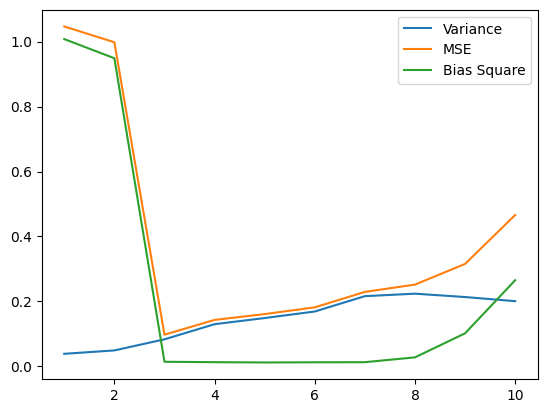

In [13]:
# 5

sns.lineplot(
    x=range(1, 11), y=map(lambda x: x["variance"], averages.values()), label="Variance"
)
sns.lineplot(x=range(1, 11), y=map(lambda x: x["mse"], averages.values()), label="MSE")
sns.lineplot(
    x=range(1, 11),
    y=map(lambda x: x["bias_square"], averages.values()),
    label="Bias Square",
)
plt.savefig("plot.png")
plt.show()